In [85]:
# Import dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# Load in csv
Lockdown_df = pd.read_csv("Resources/Countries_Lock_Down_Dates.csv")
Lockdown_df.head()
#Lockdown_df = pd.read_csv("Resources/Countries_Lock_Down_Dates.csv")

,Country,Date of Restrictions,Level,Week of Restrictions,Continent
0,Argentina,3/21/20,National,12,South America
1,Australia,3/23/20,National,13,Australia
2,Bolivia,3/22/20,National,13,South America
3,Brazil,3/17/20,State,12,South America
4,Canada,3/25/20,National,13,North America


In [87]:
# Load in AQI csv
#AQI_df = pd.read_csv("Resources/AQI_data.csv")
#AQI_df.head()
AQI_df = pd.read_csv("foo.csv")
AQI_df

,Unnamed: 0,country,week,NO2,PM2.5,Date of Restrictions,Level,Week of Restrictions,Restrictions,Restriction Week Counter
0,0,Argentina,1,9.850000,79.013889,3/21/20,National,12,No,NaN
1,1,Argentina,2,8.432540,65.119048,3/21/20,National,12,No,NaN
2,2,Argentina,3,6.671429,27.416667,3/21/20,National,12,No,NaN
3,3,Argentina,4,6.500000,23.750000,3/21/20,National,12,No,NaN
4,4,Argentina,5,5.178571,26.083333,3/21/20,National,12,No,NaN
...,...,...,...,...,...,...,...,...,...,...
567,567,Vietnam,9,13.809524,92.158730,3/31/20,National,14,No,NaN
568,568,Vietnam,10,12.873016,76.495238,3/31/20,National,14,No,NaN
569,569,Vietnam,11,12.873016,88.182540,3/31/20,National,14,No,NaN
570,570,Vietnam,12,9.492063,81.875661,3/31/20,National,14,No,NaN


In [88]:
# Combine the dataframes on the country column
combined_df = pd.merge(AQI_df,Lockdown_df,left_on="country",right_on="Country")

In [89]:
# Print the header of the combined dataframe
combined_df.head()

,Unnamed: 0,country,week,NO2,PM2.5,Date of Restrictions_x,Level_x,Week of Restrictions_x,Restrictions,Restriction Week Counter,Country,Date of Restrictions_y,Level_y,Week of Restrictions_y,Continent
0,0,Argentina,1,9.850000,79.013889,3/21/20,National,12,No,NaN,Argentina,3/21/20,National,12,South America
1,1,Argentina,2,8.432540,65.119048,3/21/20,National,12,No,NaN,Argentina,3/21/20,National,12,South America
2,2,Argentina,3,6.671429,27.416667,3/21/20,National,12,No,NaN,Argentina,3/21/20,National,12,South America
3,3,Argentina,4,6.500000,23.750000,3/21/20,National,12,No,NaN,Argentina,3/21/20,National,12,South America
4,4,Argentina,5,5.178571,26.083333,3/21/20,National,12,No,NaN,Argentina,3/21/20,National,12,South America


In [90]:
#cleaned_df = combined_df.drop(['country', 'Country'], axis = 1) 
#cleaned_df 

In [91]:
#cleaned_df2 = cleaned_df.drop(cleaned_df.loc[:, 'Level':'Week of Restrictions':].columns, axis = 1) 

In [101]:
grouped_df = pd.DataFrame(combined_df.groupby(['Continent', 'Restriction Week Counter'])["NO2"].mean())
grouped_df


NO2
Continent     Restriction Week Counter           
Africa        1.0                        6.880952
              2.0                        6.350000
Asia          1.0                       15.340149
              2.0                       16.573095
              3.0                       24.140714
              4.0                       25.897460
              5.0                       23.254497
              6.0                       19.016799
              7.0                       18.185119
              8.0                       23.535119
              9.0                       16.828571
              10.0                      15.120000
Australia     1.0                        5.237778
Europe        1.0                       11.121744
              2.0                        8.770999
              3.0                       10.366766
              4.0                       11.377778
North America 1.0                       13.805556
South America 1.0                        7.851653
              2.0                        8.730556

In [102]:
grouped_df =grouped_df.reset_index(level=['Restriction Week Counter'])
grouped_df


,Restriction Week Counter,NO2
Continent,,
Africa,1.0,6.880952
Africa,2.0,6.350000
Asia,1.0,15.340149
Asia,2.0,16.573095
Asia,3.0,24.140714
Asia,4.0,25.897460
Asia,5.0,23.254497
Asia,6.0,19.016799
Asia,7.0,18.185119


<IPython.core.display.Javascript object>


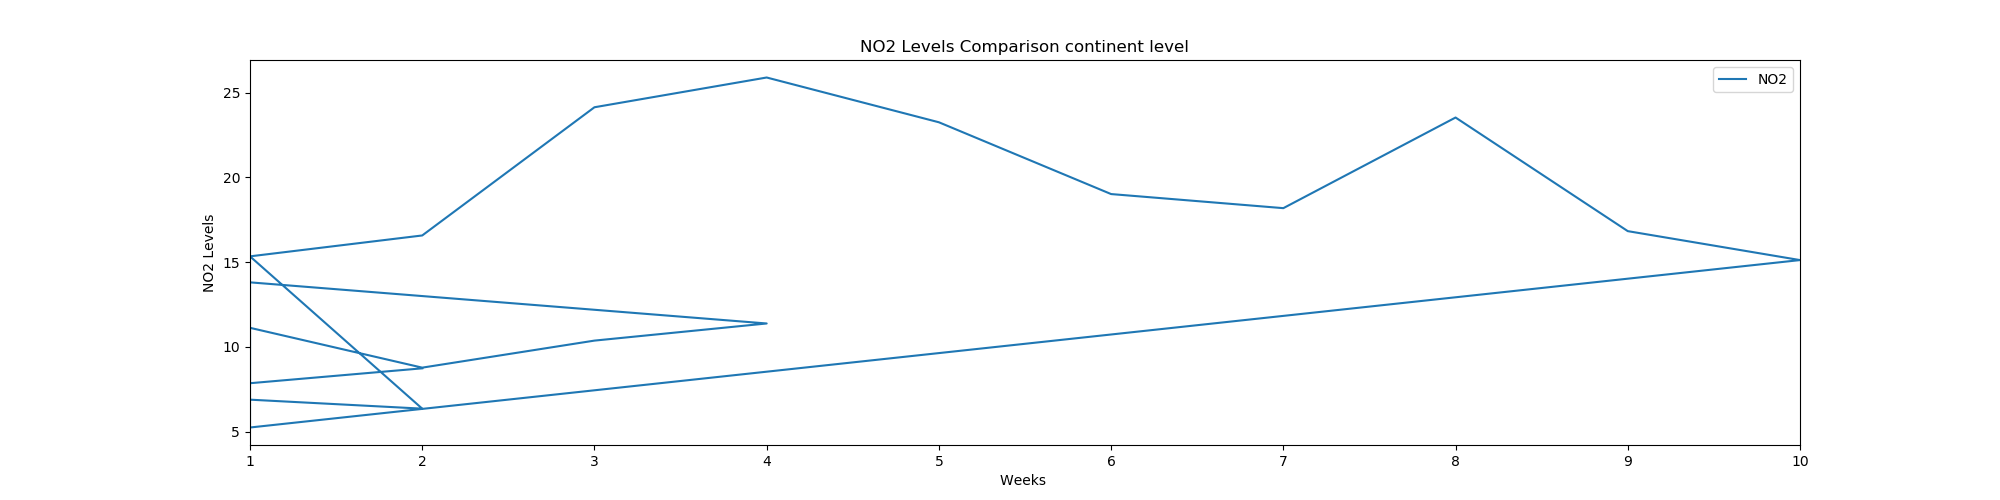

Continent
Africa            1.0
Africa            2.0
Asia              1.0
Asia              2.0
Asia              3.0
Asia              4.0
Asia              5.0
Asia              6.0
Asia              7.0
Asia              8.0
Asia              9.0
Asia             10.0
Australia         1.0
Europe            1.0
Europe            2.0
Europe            3.0
Europe            4.0
North America     1.0
South America     1.0
South America     2.0
Name: Restriction Week Counter, dtype: float64

In [94]:
# Pandas can also plot multiple columns if the DataFrame includes them
#grouped_df = grouped_df.pivot(index='Continent', columns='Restriction Week Counter', values='NO2')
x_axis = grouped_df["Restriction Week Counter"]
colors = {'Africa':'r', 'Europe':'b', 'South America':'g', 'North America':'b'}

multi_plot = grouped_df.plot(kind="line", figsize=(20,5), x ='Restriction Week Counter' , title = "NO2 Levels Comparison continent level", y = 'NO2', )
#
# PandasPlot.set_xticklabels() can be used to set the tick labels as well
#multi_plot.set_xticklabels(grouped_df["Continent"], rotation=45)
multi_plot.set_xlabel("Weeks ")
multi_plot.set_ylabel("NO2 Levels")
#multi_plot.color(colors)
plt.show()
#plt.tight_layout()
plt.savefig('PM2_levels_line.png')
x_axis